## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Load the data into pandas dataframe**

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data preprocessing**

Check for missing values in all the columns

In [9]:
# TODO NUMEROS!! NICE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# FIJAOS EN LAS MEDIAS...

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

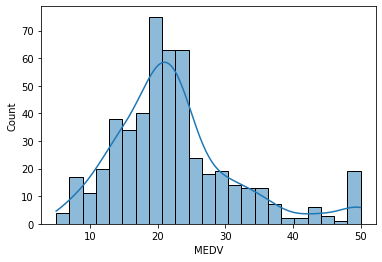

In [11]:
# DISTPLOT DE SEABORN DE LA VARIABLE MEDV

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [12]:
# CORRELATION

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

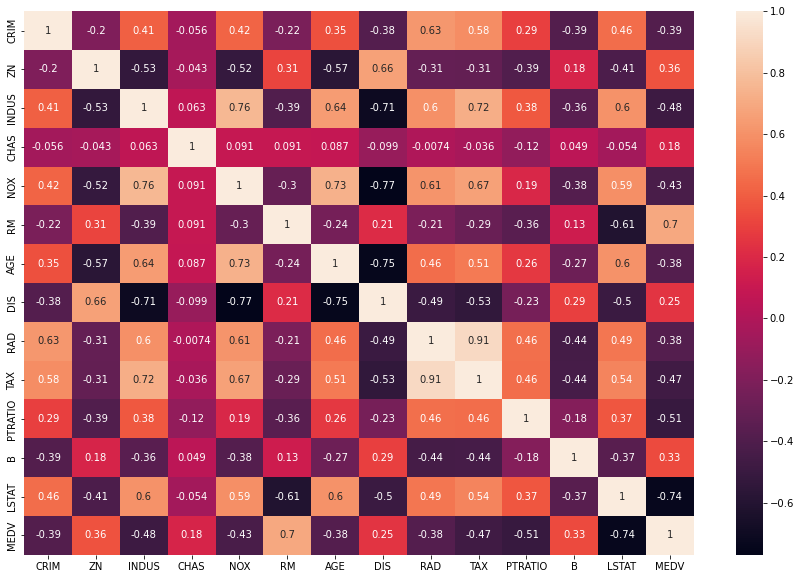

In [14]:
# HEATMAP BABY

In [14]:
# NOS CARGAMOS LA COLUMNA TAX PORQUE HAY MUCHA CORRELACION ENTRE RAD Y TAX

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

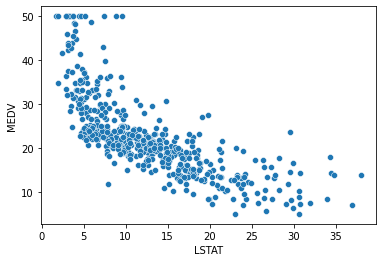

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


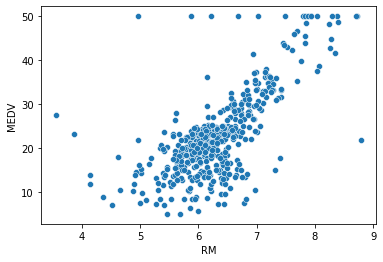

In [16]:
#

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [16]:
# LAS X TIENEN DOS COLUMNAS, LAS Y SON UNA SERIE

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [17]:
from sklearn.model_selection import train_test_split


In [19]:
# Miramos el shape de as particiones

(404, 2)
(102, 2)
(404,)
(102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [18]:
# INSTANCIA DEL MODELO Y FIT

LinearRegression()

**Evaluate the model performance in the training and testing sets**

In [19]:
# OS DEJO ESTO PERO NO OS ACOSTUMBREIS, REPASAD VUESTROS NOMBRES DE VARIABLES
# METRICAS DE TRAIN, OJO SOLO PARA VER UN POCO EL OVERFIT, PERO LAS IMPORTANTES SON LAS DE TEST
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE train', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))
print('R2 score train', r2_score(y_train, lin_reg.predict(X_train)))

MAE train 3.9404902234222137
MAPE train 0.20798676056317764
MSE train 30.39185519321462
RMSE train 5.512880843371696
R2 score train 0.6501592679428922


In [20]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, lin_reg.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))
print('R2 score test', r2_score(y_test, lin_reg.predict(X_test)))

MAE test 3.8987597213823584
MAPE test 0.2074364015370495
MSE test 31.243290601783627
RMSE test 5.589569804715174
R2 score test 0.5739577415025858


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

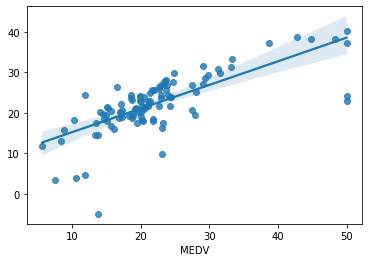

In [23]:
# ESTA OS LA DEJO POR QUE TODOS ODIAMOS ESTE PLOT
y_pred = lin_reg.predict(X_test)
sns.regplot(y_test, y_pred)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [21]:
# FIT Y TRANSFORM DEL TRAIN CON POLYNOMIALFEATURES DE GRADO 2 Y ENTRENAMOS EL MODELO CON ESOS DATOS, LO LLAMAMOS pol_reg

LinearRegression()

**Did the model improve using the Polynomial model?**

In [22]:
print('MAE train', )
print('MAPE train', )
print('MSE train',)
print('RMSE train', )
print('R2 score train',)

MAE train 3.209519522030287
MAPE train 0.1626475837183672
MSE train 21.056772244023442
RMSE train 4.588765873742465
R2 score train 0.757615434471614


In [23]:
# transformamos el test
X_poly_test = ###

In [24]:
print('MAE test', )
print('MAPE test',)
print('MSE test',)
print('RMSE test', )
print('R2 score test', )

MAE test 2.8833469473605455
MAPE test 0.1595862042516529
MSE test 18.433777739111108
RMSE test 4.293457550635747
R2 score test 0.7486318454509429


In [25]:
# REPETIR CON POLINOMIO DE GRADO 3
poly_reg_3

MAE train 3.0707405886217547
MAPE train 0.15752199776527123
MSE train 18.996091524941168
RMSE train 4.358450587644785
R2 score train 0.7813359361230123
--------------------
MAE test 3.1752907318001657
MAPE test 0.17579447606540294
MSE test 36.1149830040547
RMSE test 6.0095742781044565
R2 score test 0.507525979873426


In [28]:
# REPETIR CON POLINOMIO DE GRADO 4
poly_reg_4

MAE train 3.8341530566422453
MAPE train 0.20617113668027295
MSE train 30.121340998753293
RMSE train 5.488291264023193
R2 score train 0.6532731576090722
--------------------
MAE test 448.9788659973031
MAPE test 59.621221591152654
MSE test 16288222.153952442
RMSE test 4035.866964352572
R2 score test -222109.75785280284


COMO EL POLY REG 4 OVERFITEA (Y MUCHO!!!) SACAMOS LAS VISUALIZACIONES PARA LOS RESULTADOS DE GRADO 3

OS LAS DEJO:

In [40]:
X_all_polly = poly_reg_3.transform(X)

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

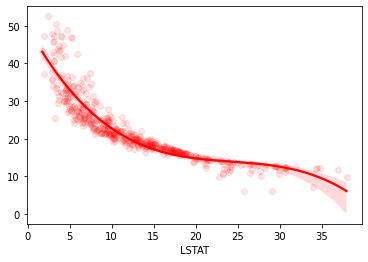

In [41]:

sns.regplot(X['LSTAT'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

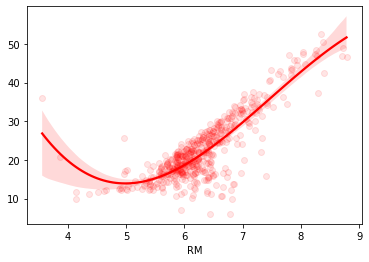

In [42]:

sns.regplot(X['RM'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})